In [1]:
import io
import requests
import pandas as pd
import numpy as np
import math
import time
import random

In [ ]:
url = "https://raw.githubusercontent.com/starwalker00/cowswap-airdrop-data/main/data/vCoW_Allocations(Updated28_01_22).csv"
fullRes=requests.get(url).content
print(fullRes[:10])

b'Account,Ai'


In [ ]:
#Account,Airdrop,GnoOption,UserOption,Claiming on:
#df=pd.read_csv(io.StringIO(fullRes.decode('utf-8')),dtype={'Account': np.str,'Airdrop': np.float, 'GnoOption': np.float, 'UserOption': np.float, 'Claiming on': np.str})
df=pd.read_csv(io.StringIO(fullRes.decode('utf-8')))
pd.set_option('display.max_columns', None)
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print(df.info())
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
# drop airdrop of no value
indexAddresses = df[ (df['Airdrop'] <= 0.1) ].index
df.drop(indexAddresses , inplace=True)
# drop GnoOption and UserOption columns
df = df.drop(df.columns[[2,3]], axis=1)
# round airdrop value
df['Airdrop'] = df['Airdrop'].apply(np.floor)
df['Airdrop'] = df['Airdrop'].astype(np.int64)
# prepare new column
df.insert(3, 'user_total_usd_value', 0)
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print(df.info())
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print(df.head())
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print(df.describe())
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")

-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55131 entries, 0 to 55130
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Account     55131 non-null  object 
 1   Airdrop     55131 non-null  float64
 2   GnoOption   55131 non-null  object 
 3   UserOption  55131 non-null  float64
 4   ClaimingOn  55131 non-null  object 
dtypes: float64(2), object(3)
memory usage: 2.1+ MB
None
-----------------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------------
                                      Account    Airdrop GnoOption  \
0  0x00000000005dbcb0d0513fcda746382fe8a53468  99.807040      0.00   
1  0x0000000000e52081b45

In [2]:
#https://openapi.debank.com/docs
#
filepath='drive/MyDrive/TMP/cowswap-airdrop-metrics-updated20220128_tmp.csv'
df=pd.read_csv(filepath)
print(df.info())

verbose = False
print_ind = True
nb_row = len(df.index)
print(nb_row)
nb_rows_between_sleep = 750
max_row = 10000000000
#for ind in df.index:
for ind in range(46498, nb_row):
  print("-------------------------------")
  print(ind,"/",nb_row) if print_ind == True else 0
  time.sleep(0.2)
  if ind == max_row:
    break
  elif (ind != 0 ) & (ind % nb_rows_between_sleep == 0):
    sleep_time_between_batch_of_calls = random.randrange(2, 10, 2)
    print("sleep ",sleep_time_between_batch_of_calls)
    filepath='drive/MyDrive/TMP/cowswap-airdrop-metrics-updated20220128_tmp.csv'
    df.to_csv(filepath)
    print("saved")
    time.sleep(sleep_time_between_batch_of_calls)
  print(ind, df['Account'][ind], df['Airdrop'][ind]) if verbose == True else 0
  request_url = "https://openapi.debank.com/v1/user/total_balance?id=" + str(df['Account'][ind])
  print(request_url) if verbose == True else 0
  result = requests.get(request_url, headers={"accept":"application/json"})
  print(result.status_code) #if verbose == True else 0
  try:
    result_json = result.json()
    print(result_json) if verbose == True else 0
    user_total_usd_value=result_json['total_usd_value']
    print(user_total_usd_value) if verbose == True else 0
    user_total_usd_value = math.floor(user_total_usd_value)
    print(user_total_usd_value) #if verbose == True else 0
    #df['user_total_usd_value'][ind] = user_total_usd_value
    df.at[ind, 'user_total_usd_value'] = user_total_usd_value
  except:
    print("An exception occurred")

filepath='drive/MyDrive/TMP/cowswap-airdrop-metrics-updated20220128_finished.csv'
df.to_csv(filepath)
print("saved finished")

print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print(df.info())
print("-----------------------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------------------")
print(df.head())

Streaming output truncated to the last 5000 lines.
200
156
-------------------------------
53888 / 55129
200
878818
-------------------------------
53889 / 55129
200
6265
-------------------------------
53890 / 55129
200
289374
-------------------------------
53891 / 55129
200
430834
-------------------------------
53892 / 55129
200
792751
-------------------------------
53893 / 55129
200
433848
-------------------------------
53894 / 55129
200
116959352
-------------------------------
53895 / 55129
200
141619
-------------------------------
53896 / 55129
200
180000
-------------------------------
53897 / 55129
200
162974521
-------------------------------
53898 / 55129
200
89249
-------------------------------
53899 / 55129
200
14345499
-------------------------------
53900 / 55129
200
2576832
-------------------------------
53901 / 55129
200
31776
-------------------------------
53902 / 55129
200
98253666
-------------------------------
53903 / 55129
200
424438
----------------------

In [10]:
print(df.head())
df.drop(df.columns[0], axis=1, inplace=True)
print(df.head())

   Unnamed: 0.1.1.1  ... user_total_usd_value
0                 0  ...                12138
1                 1  ...               180216
2                 2  ...                 3765
3                 3  ...                  773
4                 4  ...                   41

[5 rows x 5 columns]
                                      Account  ...  user_total_usd_value
0  0x00000000005dbcb0d0513fcda746382fe8a53468  ...                 12138
1  0x0000000000e52081b4531278fcd274e5f3cd86b5  ...                180216
2  0x0000000034bc2b18f774362282b3319e78ea4ede  ...                  3765
3  0x00000000cc0b822819f03424dacf9077fdaa58a3  ...                   773
4  0x00000001a0f57e850c9db68b4a9bc34677437c5c  ...                    41

[5 rows x 4 columns]


In [11]:
pd.set_option('display.max_columns', None)
print(df.head())

                                      Account  Airdrop    ClaimingOn  \
0  0x00000000005dbcb0d0513fcda746382fe8a53468       99  Gnosis Chain   
1  0x0000000000e52081b4531278fcd274e5f3cd86b5       99  Gnosis Chain   
2  0x0000000034bc2b18f774362282b3319e78ea4ede        3  Gnosis Chain   
3  0x00000000cc0b822819f03424dacf9077fdaa58a3       99  Gnosis Chain   
4  0x00000001a0f57e850c9db68b4a9bc34677437c5c       99  Gnosis Chain   

   user_total_usd_value  
0                 12138  
1                180216  
2                  3765  
3                   773  
4                    41  


In [12]:
### REINDEX
df = df.reindex(columns=["Account", "ClaimingOn", "user_total_usd_value", "Airdrop"])
print(df.head())

                                      Account    ClaimingOn  \
0  0x00000000005dbcb0d0513fcda746382fe8a53468  Gnosis Chain   
1  0x0000000000e52081b4531278fcd274e5f3cd86b5  Gnosis Chain   
2  0x0000000034bc2b18f774362282b3319e78ea4ede  Gnosis Chain   
3  0x00000000cc0b822819f03424dacf9077fdaa58a3  Gnosis Chain   
4  0x00000001a0f57e850c9db68b4a9bc34677437c5c  Gnosis Chain   

   user_total_usd_value  Airdrop  
0                 12138       99  
1                180216       99  
2                  3765        3  
3                   773       99  
4                    41       99  


In [13]:
### SAVE
filepath='drive/MyDrive/TMP/cowswap-airdrop-metrics-updated20220128_final.csv'
df.to_csv(filepath)

In [71]:
### READ
filepath='drive/MyDrive/TMP/cowswap-airdrop-metrics-updated20220128_final.csv'
df_read = pd.read_csv(filepath,index_col=[0])

#df_read['user_total_usd_value']=df_read['user_total_usd_value']/1000 #convert to k$
print(df_read.info())
print(df_read.head())
print(df_read.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55129 entries, 0 to 55128
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Account               55129 non-null  object
 1   ClaimingOn            55129 non-null  object
 2   user_total_usd_value  55129 non-null  int64 
 3   Airdrop               55129 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.1+ MB
None
                                      Account    ClaimingOn  \
0  0x00000000005dbcb0d0513fcda746382fe8a53468  Gnosis Chain   
1  0x0000000000e52081b4531278fcd274e5f3cd86b5  Gnosis Chain   
2  0x0000000034bc2b18f774362282b3319e78ea4ede  Gnosis Chain   
3  0x00000000cc0b822819f03424dacf9077fdaa58a3  Gnosis Chain   
4  0x00000001a0f57e850c9db68b4a9bc34677437c5c  Gnosis Chain   

   user_total_usd_value  Airdrop  
0                 12138       99  
1                180216       99  
2                  3765        3  
3                 

       user_total_usd_value       Airdrop
count          5.512900e+04  5.512900e+04
mean           7.739664e+05  2.720266e+03
std            9.624549e+07  2.178285e+05
min            0.000000e+00  3.000000e+00
25%            8.400000e+01  9.900000e+01
50%            1.189000e+03  9.900000e+01
75%            1.486800e+04  1.530000e+02
max            2.239422e+10  5.000000e+07


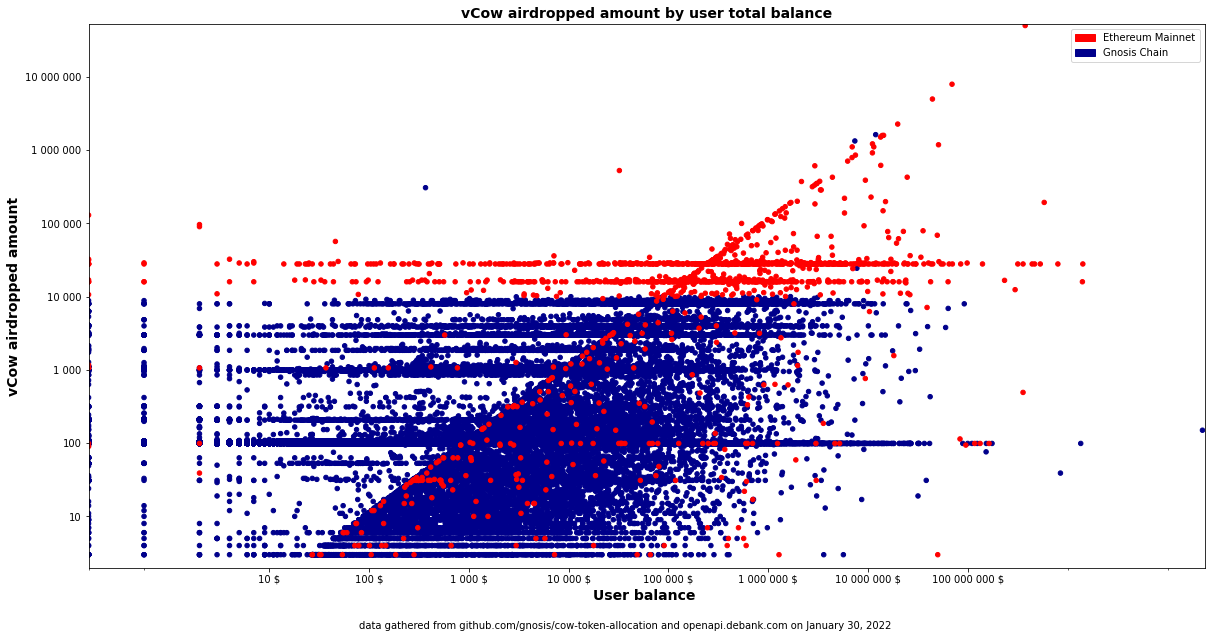

In [70]:
## PLOT

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from matplotlib.ticker import *
from matplotlib.scale import *
from matplotlib.font_manager import FontProperties

print(df_read.describe())

font = FontProperties()
#font.set_family('serif')
font.set_size(14)
#font.set_name('Times New Roman')
#font.set_style('italic')
font.set_weight('bold')

#plot
fig, axs = plt.subplots(figsize=(20, 10))
axs.set_title('vCow airdropped amount by user total balance', fontproperties=font)
#df_read.plot.scatter(ax=axs, x='user_total_usd_value',y='Airdrop', alpha=0.5, c=df_read['ClaimingOn'])
df_read.plot.scatter(ax=axs, x='user_total_usd_value',y='Airdrop',c=df_read['ClaimingOn'].apply(lambda val: "Red" if val == "Ethereum Mainnet" else "Darkblue"))
#add legend mainnet/gnosis
red_patch = mpatches.Patch(color='Red', label='Ethereum Mainnet')
darkblue_patch = mpatches.Patch(color='Darkblue', label='Gnosis Chain')
axs.legend(handles=[red_patch, darkblue_patch])
#plt.figtext(0.5, 0.01, "data gathered from github.com/gnosis/cow-token-allocation and openapi.debank.com", ha="center", fontsize=10, bbox={"facecolor":"orange", "alpha":0.5, "pad":5})
plt.figtext(0.5, 0.04, "data gathered from github.com/gnosis/cow-token-allocation and openapi.debank.com on January 30, 2022  ", ha="center", fontsize=10)
#fig.patch.set_facecolor('black')
#fig.patch.set_alpha(0.1)
#axs.patch.set_facecolor('white')
#axs.patch.set_alpha(1)
#axes labels
axs.set_xlabel("User balance \n", fontproperties=font)
axs.set_ylabel("vCow airdropped amount", fontproperties=font)
#axes x scale
axs.set_xlim(left=0)
axs.set_xscale('symlog')
positions = [10, 100, 1000, 1e4, 1e5, 1e6, 1e7, 1e8]
labels = ['10 $', '100 $', '1 000 $', '10 000 $', '100 000 $', '1 000 000 $', '10 000 000 $', '100 000 000 $']
axs.xaxis.set_major_locator(FixedLocator(positions))
axs.xaxis.set_major_formatter(FixedFormatter(labels))
#axes y scale
axs.set_ylim(bottom=2)
axs.set_yscale('symlog')
positions = [10, 100, 1000, 1e4, 1e5, 1e6, 1e7, 1e8]
labels = ['10', '100', '1 000', '10 000', '100 000', '1 000 000', '10 000 000', '100 000 000']
axs.yaxis.set_major_locator(FixedLocator(positions))
axs.yaxis.set_major_formatter(FixedFormatter(labels))

#fig.savefig("drive/MyDrive/TMP/cowswap-airdrop-metrics.jpg",facecolor='white', transparent=False)
fig.savefig("drive/MyDrive/TMP/cowswap-airdrop-metrics.jpg",transparent=False)

(array([5.5125e+04, 3.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 1.11971113e+09, 2.23942225e+09, 3.35913338e+09,
        4.47884450e+09, 5.59855563e+09, 6.71826675e+09, 7.83797788e+09,
        8.95768900e+09, 1.00774001e+10, 1.11971113e+10, 1.23168224e+10,
        1.34365335e+10, 1.45562446e+10, 1.56759558e+10, 1.67956669e+10,
        1.79153780e+10, 1.90350891e+10, 2.01548003e+10, 2.12745114e+10,
        2.23942225e+10]),
 <a list of 20 Patch objects>)

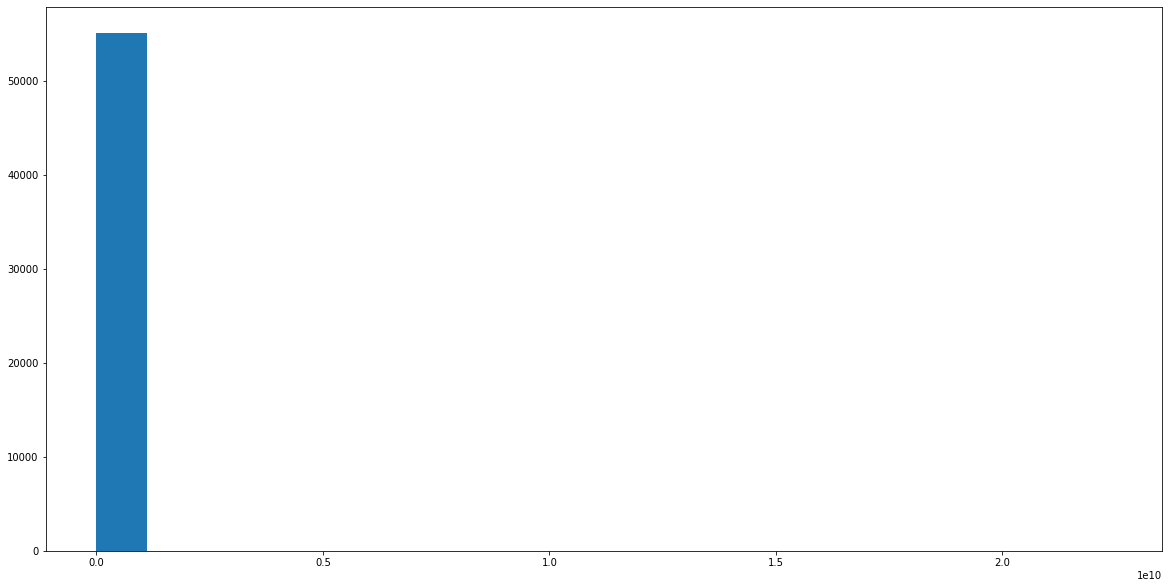

In [74]:
## HIST
#plt.plot.hist(df_read['user_total_usd_value'])
fig, axs = plt.subplots(figsize=(20, 10))
n_bins = 20
axs.hist(df_read['user_total_usd_value'], bins=n_bins)

In [84]:
## CHECKS
pd.set_option('display.max_columns', None)
#subset_df = df_read[df_read["user_total_usd_value"] > 100e7]
subset_df = df_read[df_read["user_total_usd_value"] < 100]
column_count = subset_df.count()
print(column_count)
print(subset_df)
print(subset_df.describe())

Account                 14429
ClaimingOn              14429
user_total_usd_value    14429
Airdrop                 14429
dtype: int64
                                          Account        ClaimingOn  \
4      0x00000001a0f57e850c9db68b4a9bc34677437c5c      Gnosis Chain   
6      0x0000000525f401e23b450dc1dffd3c7286490b95      Gnosis Chain   
14     0x00000a600e64c26be24f64169c89f21c1f530000      Gnosis Chain   
17     0x0000baa55a9c2a06a3922c563d8d9fcb1a0dbf2f      Gnosis Chain   
19     0x0000d211abbb7f8d9e126ed7deca862dae8784a6      Gnosis Chain   
...                                           ...               ...   
55060  0xf4336d80da879c3f3e2e3080d81a6c4a6cc934ed  Ethereum Mainnet   
55099  0xfb176849773199f6874cb845e8526ac648d6bc2f  Ethereum Mainnet   
55118  0xfeb55c331a059ddfb28df94bd8e2ae008d8aa33f  Ethereum Mainnet   
55123  0xff357c416ce671c1e64d3d560f2221b1110b1afc  Ethereum Mainnet   
55126  0xff69fd52928edbd4185faa05cfe563714e671be2  Ethereum Mainnet   

       user_to